<a href="https://colab.research.google.com/github/josewborba/portfolio/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [87]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [88]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/University Of Texas/Python fundations/ProjectPyhonFoundations-FoodHubDataAnalysis/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [90]:
df.shape

(1898, 9)

#### Observations:

The dataframe has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [91]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

Rating is defined as object. I'd expect it to be int or float


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [92]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [93]:
df['rating'].value_counts(normalize=True) * 100

Not given   38.778
5           30.980
4           20.337
3            9.905
Name: rating, dtype: float64

In [94]:
df['rating_numerical'] = df['rating'].replace("Not given", np.nan).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   rating_numerical       1162 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 148.4+ KB


#### Observations:

*   There are no null data.

*   Most of the orders don't have a rate given, that's why it isn't classified as int. 

*   I don't think it's fair to replace the "Not given" by zero or by the median or average once that not giving a rate is a different choice than rating as the average or rating as the lowest(zero)

*   In order to perform some operations such as sum, average on the rating column I created an additional column called "rating_numerical" in which I replaced "Not given" for NaN and this value will be ignored at those operations


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000
rating_numerical,1162.000,4.344,0.741,3.000,4.000,5.000,5.000,5.000


#### Observations:

Food preparation time:

Min: 20 minutes

Median: 27.00
Average: 27.37 minutes

Max: 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [96]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

736 orders are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [97]:
#Checking again the columns of the df

df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'rating_numerical'],
      dtype='object')

In [98]:
categorical = ['cuisine_type','day_of_the_week','rating']
numerical = ['cost_of_the_order','food_preparation_time', 'delivery_time', 'rating_numerical']

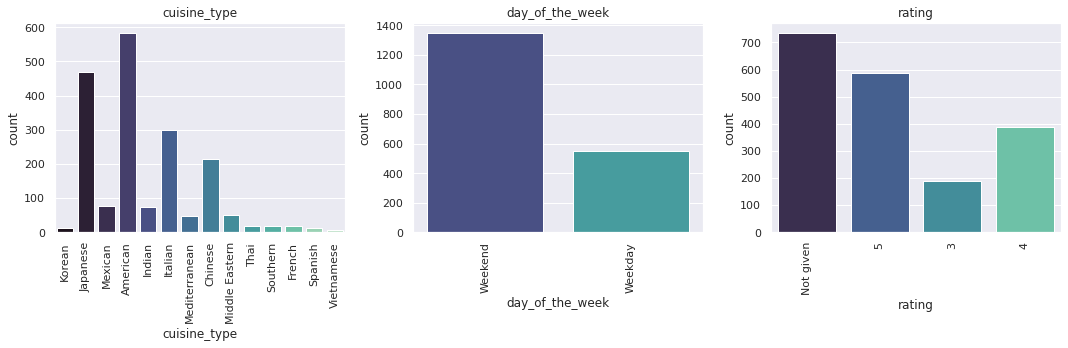

In [99]:
plt.figure(figsize=(15,5))
sns.set_theme()

for i,column in enumerate(categorical):
  plt.subplot(1, 3, i + 1)
  sns.countplot(data=df, x=df[column], palette="mako")
  plt.tight_layout()
  plt.title(column)
  plt.xticks(rotation=90)

plt.show()
  

insights

Cuisine types:

*   American, Japanese, Italian and Chinese are the most popular cuisines

Day of the Week:

*   Most of the ordens happens at weekends

Rating:

*   Most of the orders are "Not Given"
*   Second most popular grade are decrescent order: five, four and three.
*   There's an absense of rating one or two which could indicate that the costumers only rate when they have to median to good experience. Not rating could mean the costumers didn't like the order so they didn't evaluate

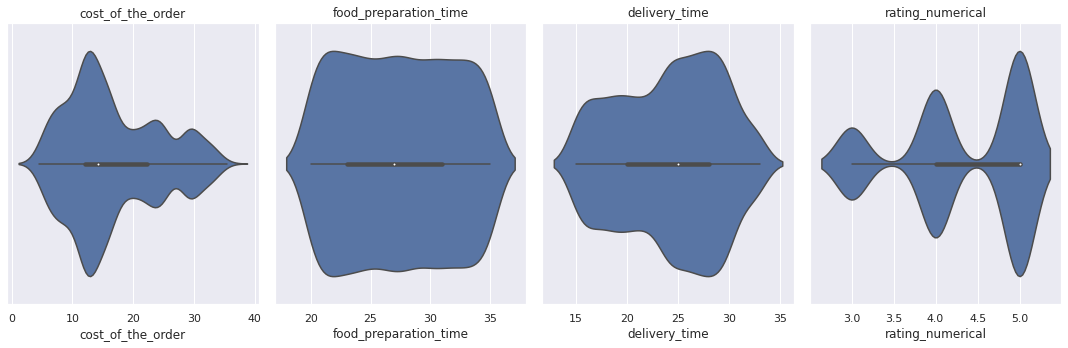

In [100]:
plt.figure(figsize=(15,5))
sns.set_theme()

for i,column in enumerate(numerical):
  plt.subplot(1, 4, i + 1)
  sns.violinplot(data=df, x=df[column])
  plt.tight_layout()
  plt.title(column)

plt.show()

Insights:

Cost of Order:

*   The distribution is right skewed and the median is close to 25%

Food Preparation Time:
*   Is an uniform distribution

Delivery Time:

*   Left skewed distribution. Most of the orders are below 25 minutes

Rating numerical:

*   Noted the absense of low values: one and two. That might indicate that costumers feel more likely to rate when they have good experiences. Please observe that the median is right next to 75%.

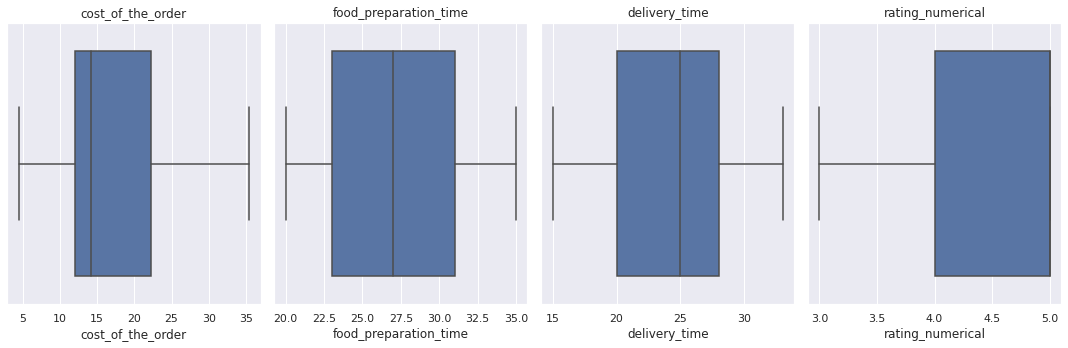

In [101]:
sns.set_theme()
plt.figure(figsize=(15,5))

for i,column in enumerate(numerical):
  plt.subplot(1, 4, i + 1)
  sns.boxplot(data=df, x=df[column])
  plt.tight_layout()
  plt.title(column)

plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [102]:
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:

The top 5 restaurants are:

*   Shake Shack
*   The meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken
*   Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [103]:
weekends = df[df['day_of_the_week']=='Weekend']

weekends.groupby('cuisine_type')['order_id'].count().sort_values(ascending=False)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: order_id, dtype: int64

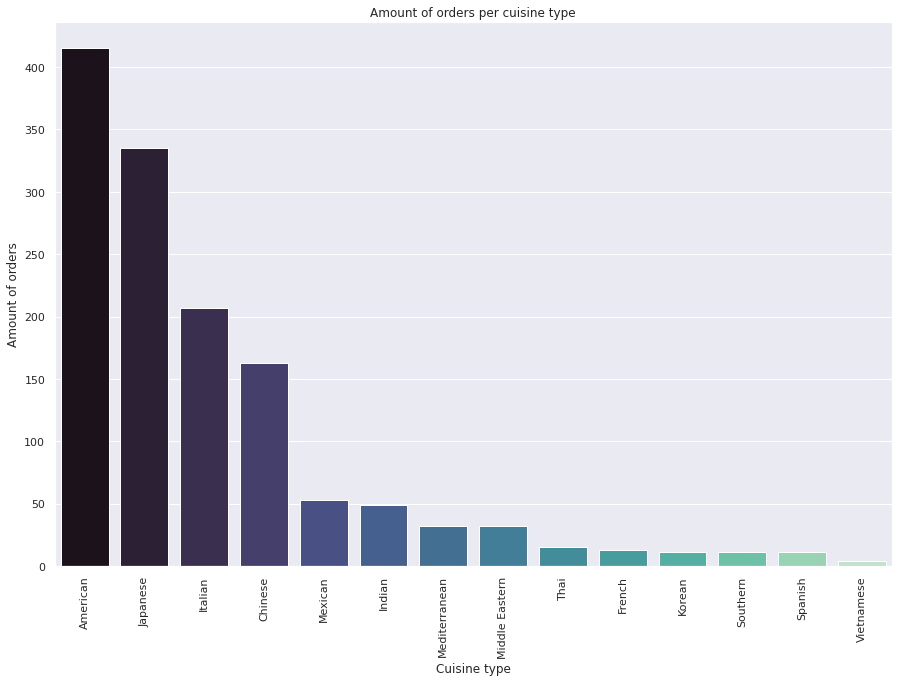

In [104]:
sns.set_theme()

plt.figure(figsize=(15,10))
sns.countplot(data=weekends, x='cuisine_type', order=weekends['cuisine_type'].value_counts(ascending=False).index, palette="mako")
plt.xticks(rotation=90)
plt.xlabel('Cuisine type')
plt.ylabel('Amount of orders')
plt.title('Amount of orders per cuisine type');

#### Observations:

Most popular cuisines on weekends are:

*   American
*   Japonese
*   Italian

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [105]:
df['more20'] = df['cost_of_the_order'] > 20
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_numerical,more20
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,NaN,True
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,NaN,False
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,5.000,False
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,3.000,True
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,4.000,False


In [106]:
df['more20'].value_counts(normalize=True)*100

False   70.759
True    29.241
Name: more20, dtype: float64

#### Observations:

The % of orders above 20 dollars is 70.756%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [107]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:

The mean of the delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [108]:
df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head()

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
Name: order_id, dtype: int64

#### Observations:

The top 5 customers are:



1.   52832 - 13 orders
2.   47440 - 10 orders
3.   83287 - 9 orders
4.   250494 - 8 orders
5.   65009 - 7 orders




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [109]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'rating_numerical', 'more20'],
      dtype='object')

<Figure size 1080x1080 with 0 Axes>

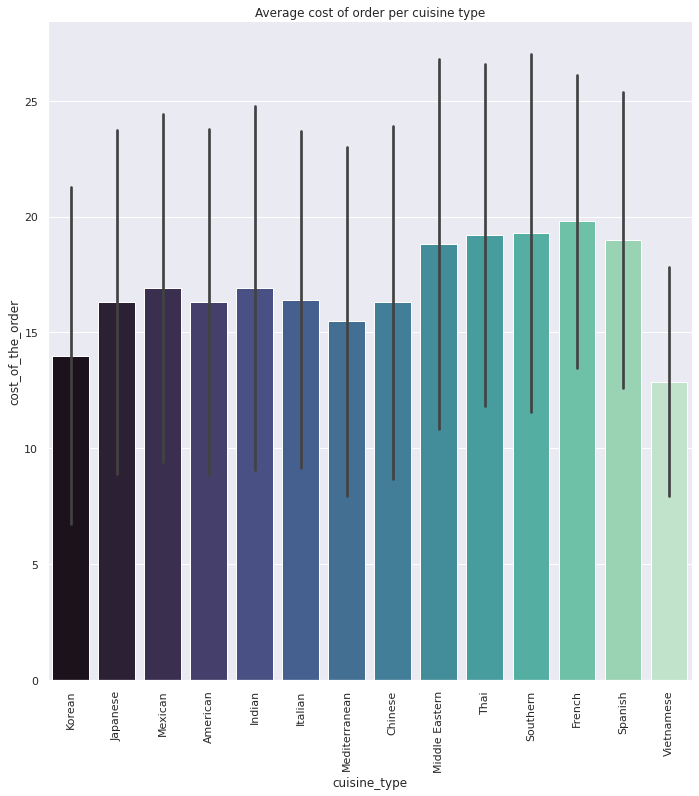

In [110]:
sns.set_theme()
plt.figure(figsize=(15,15));

sns.catplot(data=df, y='cost_of_the_order', x='cuisine_type', ci='sd', kind='bar', height=10, aspect=1, palette='mako')
plt.xticks(rotation=90)
plt.title('Average cost of order per cuisine type');

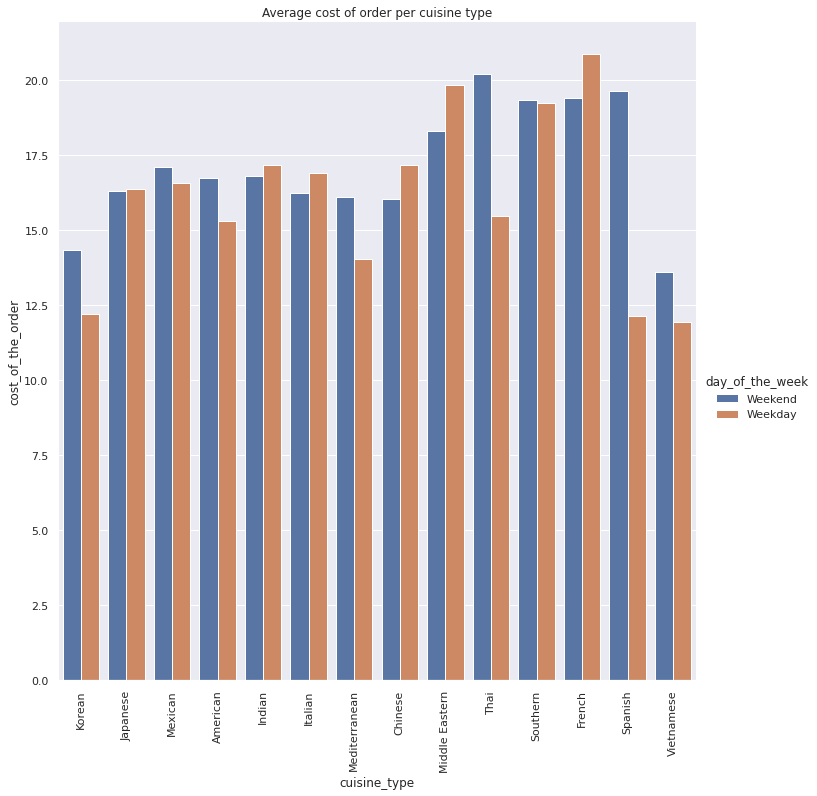

In [111]:

sns.catplot(data=df, y='cost_of_the_order', x='cuisine_type', ci=False, kind='bar', hue='day_of_the_week', height=10, aspect=1)
plt.xticks(rotation=90)
plt.title('Average cost of order per cuisine type');

Insights:

*   The standard deviation is high which indicates that the prices vary a lot for all cuisines
*   French is, in average, the most expensive cuisine. Although southern cuisine has the order that reached the highest price.
*   Spanish, Thai, Korean and Mediterranean cuisines have high difference between the average cost in the weekends to week days which might indicate that when costumers are willing to spend more on meals they choose those cuisines


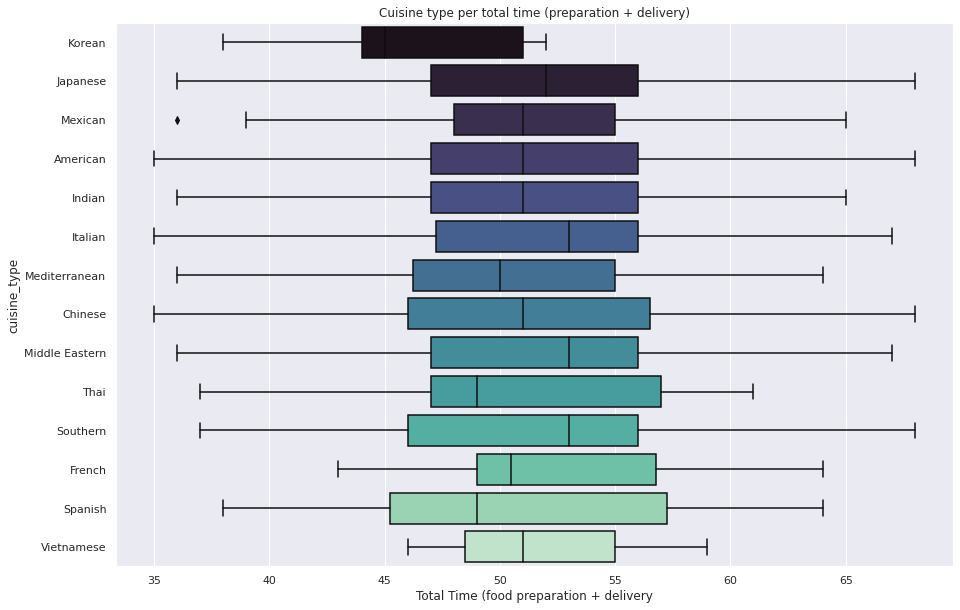

In [112]:
totaltime = df['food_preparation_time'] + df['delivery_time']

plt.figure(figsize=(15,10))
sns.boxplot(data=df, x=totaltime, y='cuisine_type', palette="mako")
plt.title('Cuisine type per total time (preparation + delivery)')
plt.xlabel('Total Time (food preparation + delivery');

Insights:

*   Korean is the fastest cuisine between order and delivery time
*   Mediterranean, Middle Eastern and Italian are the cuisines that takes more time in the median
*   Of the most ordered cuisines only Italian is the one among the cuisines that takes more time to be delivered

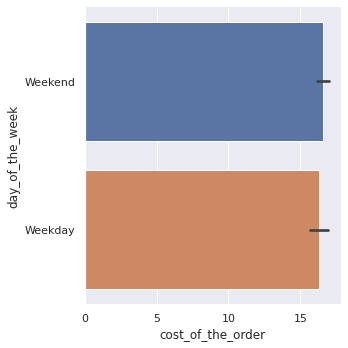

In [113]:
sns.catplot(data=df, x='cost_of_the_order', y='day_of_the_week', kind='bar');

Insights:

*   On the average we cannot notice difference of price of orders that happens in weekend or weekdays BUT I will deepen my analysis on the weekdays

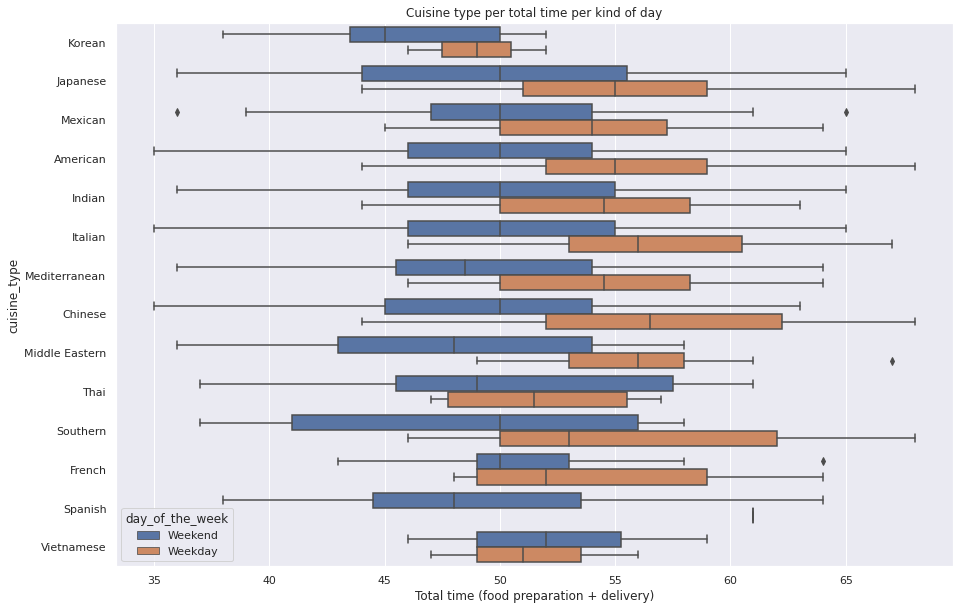

In [114]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df, x=totaltime, y='cuisine_type', hue='day_of_the_week')
plt.title('Cuisine type per total time per kind of day')
plt.xlabel('Total time (food preparation + delivery)');


Insights:


*   On weekdays the orders take longer in total time than in the weekends
*   In general weekday orders take longer to be prepared and delivered
*   There's high difference in total time in each cuisine between the total time of the order on the weekends and the weekdays. Which might suggest difference of kind of the plate ordered OR that in the weekdays there are more orders and the restaurant take longer to prepare. 

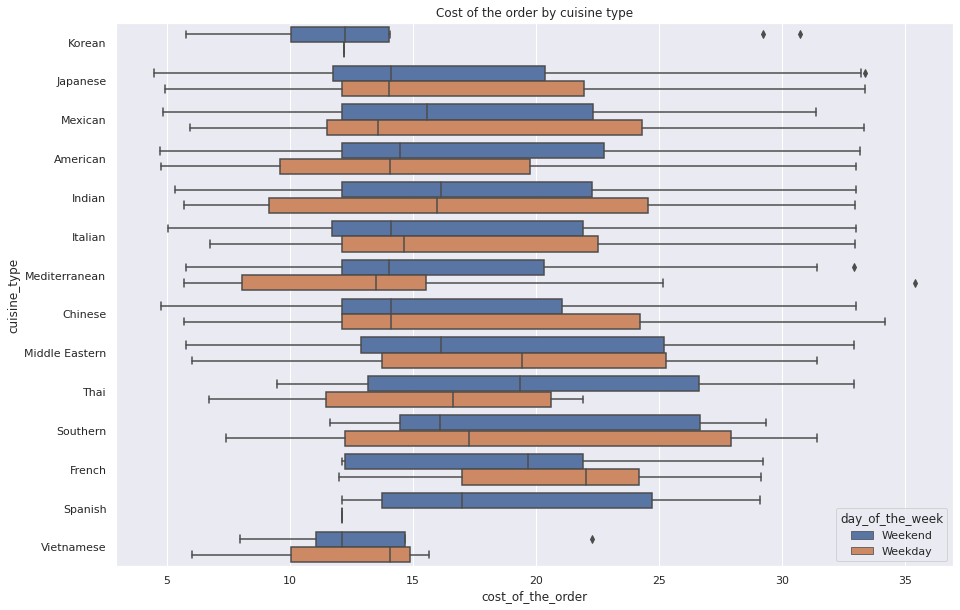

In [115]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='cost_of_the_order', y='cuisine_type', hue='day_of_the_week')
plt.title('Cost of the order by cuisine type');

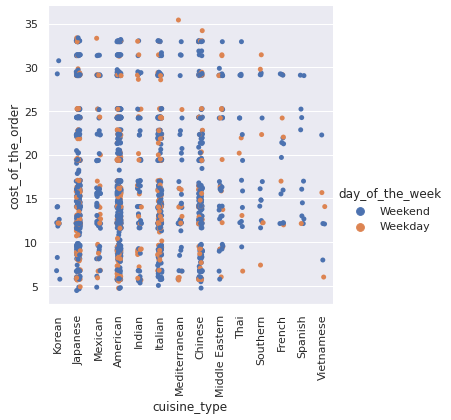

In [116]:
sns.catplot(data=df, y='cost_of_the_order', x='cuisine_type', ci='sd', kind='strip', hue='day_of_the_week')
plt.xticks(rotation=90);

Insights:

*   Spanish, French, Thai and Mediterranean cuisines are mainly ordered on weekends.

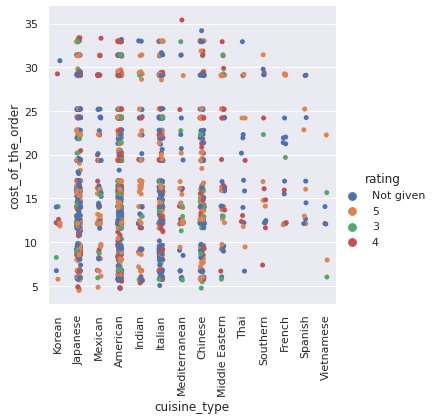

In [117]:
sns.catplot(data=df, y='cost_of_the_order', x='cuisine_type', ci='sd', kind='strip', hue='rating')
plt.xticks(rotation=90);

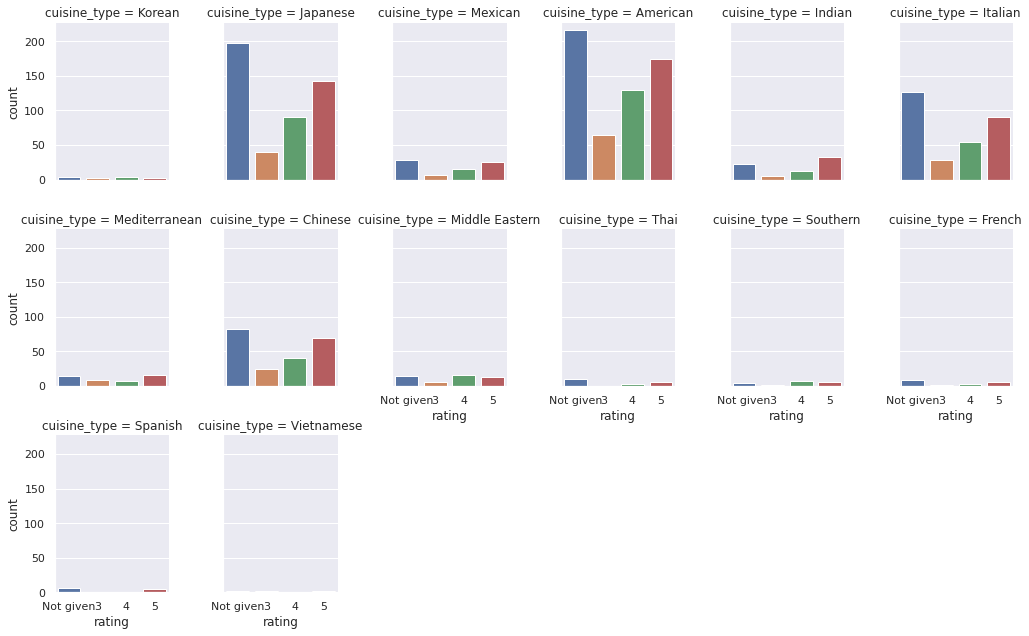

In [118]:

sns.catplot(data=df, col='cuisine_type', x='rating', kind='count', col_wrap=6, legend=True, height=3, aspect=0.8, order=['Not given','3','4','5']);



Insights:

The rates are well divided into every cuisine type and the cuisines with most "Not given" are the cuisines with most orders. So apparently there's no pattern here.

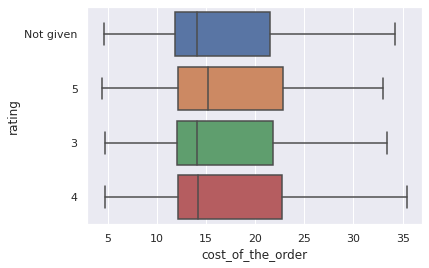

In [119]:
sns.boxplot(data=df, y='rating', x='cost_of_the_order');

I had 2 hypothesis here:

1.   The cheapest orders generate most "Not given" rates and once the order is not that sofisticated (more like day to day food) it didn't excite the costumer to the point to rate or not
2.   The most expensive orders are responsable for the high rates OR responsible for the "Not given". Cause I suspect that "Not given" rates are equivalent to low grades (one and two), but couldn't find anything in the data to justify this hint.

Both hypothesis are discarded.

insights:

*   Don't seem to be any relation between rating and cost of the order
*   The "Not given" rates are present during whole costs and in all cuisines (previous graph), so from now on, I'll assume that the "Not given" is not related to these features.

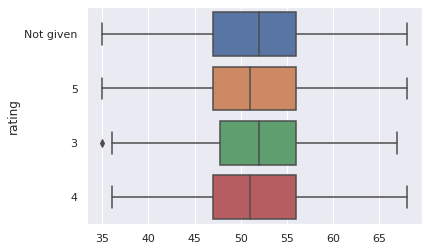

In [120]:
sns.boxplot(data=df, y='rating', x=totaltime);

insights:

*   Don't seem to be any relation between rating and total time of the order
*   Also can't find any patter that justify the "Not given" rate related to time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [121]:
subset = df.groupby('restaurant_name')['rating_numerical'].agg(['count','mean']).reset_index()
subset.head()

,restaurant_name,count,mean
0,'wichcraft,1,5.000
1,12 Chairs,2,4.500
2,5 Napkin Burger,2,4.000
3,67 Burger,1,5.000
4,Alidoro,0,NaN


In [122]:
subset[(subset['count'] > 50) & (subset['mean'] > 4)].sort_values(by=['count','mean'],ascending=False)

,restaurant_name,count,mean
136,Shake Shack,133,4.278
153,The Meatball Shop,84,4.512
21,Blue Ribbon Sushi,73,4.219
20,Blue Ribbon Fried Chicken,64,4.328


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [123]:
df['cost_of_the_order'].max()

35.41

In [124]:
charges_percent = []

for lab,row in df.iterrows():
  if row['cost_of_the_order'] < 5:
    charges_percent.append(0.0)
  elif row['cost_of_the_order'] > 5 and row['cost_of_the_order'] < 20:
    charges_percent.append(0.15)
  else: 
    charges_percent.append(0.25)

charges_percent[0:5]

[0.25, 0.15, 0.15, 0.25, 0.15]

In [125]:
df['charges_percent'] = charges_percent
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_numerical,more20,charges_percent
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,NaN,True,0.250
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,NaN,False,0.150
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,5.000,False,0.150
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,3.000,True,0.250
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,4.000,False,0.150
5,1477224,147468,Tamarind TriBeCa,Indian,25.220,Weekday,3,20,24,3.000,True,0.250
6,1477894,157711,The Meatball Shop,Italian,6.070,Weekend,Not given,28,21,NaN,False,0.150
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3,33,30,3.000,False,0.150
8,1477174,121706,Anjappar Chettinad,Indian,16.440,Weekday,5,21,26,5.000,False,0.150
9,1477311,39705,Bukhara Grill,Indian,7.180,Weekday,5,29,26,5.000,False,0.150


In [126]:
df['charges_percent'].value_counts()

0.150    1334
0.250     555
0.000       9
Name: charges_percent, dtype: int64

In [127]:
#checking if the thresholds are ok

pd.pivot_table(data=df, index='charges_percent', values='cost_of_the_order', aggfunc=['max','min']).reset_index()

,charges_percent,max,min
,,cost_of_the_order,cost_of_the_order
0,0.000,4.900,4.470
1,0.150,19.980,5.050
2,0.250,35.410,20.130


In [128]:
df['revenue_per_order'] = df['cost_of_the_order'] * df['charges_percent']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_numerical,more20,charges_percent,revenue_per_order
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,NaN,True,0.250,7.688
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,NaN,False,0.150,1.812
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,5.000,False,0.150,1.835
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,3.000,True,0.250,7.300
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,4.000,False,0.150,1.738


In [129]:
df['revenue_per_order'].sum()

6166.303

#### Observations:

The revenue across all orders is US$6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [130]:
df['totaltime'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_numerical,more20,charges_percent,revenue_per_order,totaltime
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,NaN,True,0.250,7.688,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,NaN,False,0.150,1.812,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,5.000,False,0.150,1.835,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,3.000,True,0.250,7.300,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,4.000,False,0.150,1.738,49


In [131]:
over60 = []

for lab, row in df.iterrows():
  if row['totaltime'] < 60:
    over60.append('Less60')
  else: over60.append('Over60')

over60[0:5]
  

['Less60', 'Less60', 'Less60', 'Less60', 'Less60']

In [132]:
df['over60'] = over60
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_numerical,more20,charges_percent,revenue_per_order,totaltime,over60
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,NaN,True,0.250,7.688,45,Less60
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,NaN,False,0.150,1.812,48,Less60
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,5.000,False,0.150,1.835,51,Less60
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,3.000,True,0.250,7.300,40,Less60
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,4.000,False,0.150,1.738,49,Less60


In [133]:
df['over60'].value_counts(normalize=True)*100

Less60   87.092
Over60   12.908
Name: over60, dtype: float64

#### Observations:

12.90% of the orders take more than 60 minutes

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [134]:
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.340
Weekend   22.470
Name: delivery_time, dtype: float64

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  According to the data, most of the users don't rate the order (39%) and when we look at the order rate distribution it lacks the rates 0, 1 or 2 which might indicate that the costumers only rate good experiences. Which might be dangerous because if the "Not given" rates are the ones that represent the bad experiencies we might have the costumers having bad experiences over most of the orders
*   This rate problem is even more serious because if confirmed the hypothesis, our average rating metric for each restaurt has high bias and cannot be trusted
*   Didn't find any pattern regard what makes costumer rates high or low or even not rate the order. For that would need more data on WHY or WHAT is he rating.

Behavioral insights:


*   Italian, Japonese and American cuisines are the most ordered cuisines
*   Mediterranean, Thai, Spanish and French cuisines are the cuisines with higher average price AND are more associated to weekends (which means the average price on weekends AND most of the orders happen on weekends).
*   The orders on weekends take more time to be prepared and delivery, which indicates that even when clients are ordering same cuisines that they do on weekdays they order different plates that take longer to be prepared

### Recommendations:

*  Develop some campaign to encorage costumers to rate every order.
* Split the rating into categories such as: 'flavour','delivery time','quality of the meal'. So we could better understand the if the reasons that motivate the low or high rating are more related to the meal itself or the preparation/delivery time or other factors.
*   The efforts of the platform should be focused on enriching the dataset and gathering more data, so we could better understand  

---